In [91]:
import copy
import numpy as np
from matplotlib import pyplot as plt

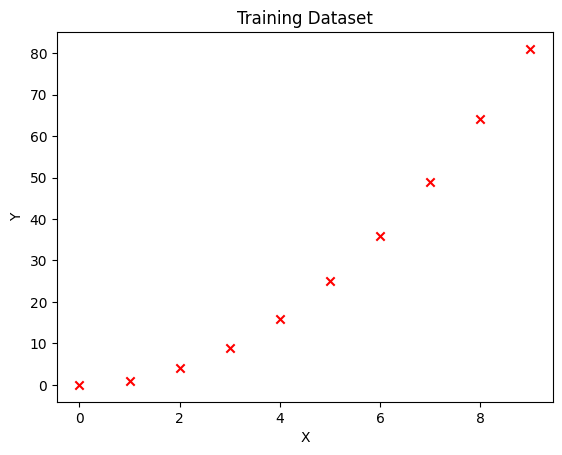

In [92]:
m = 50
x_train = np.arange(m)
y_train = x_train ** 2
plt.title("Training Dataset")
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(x_train, y_train, marker="x", c="r")
plt.show()


### Fitting Using Linear Regression

In [93]:
# Model: f_wb(x) = w * x + b
def prediction(x, w, b):
    return w * x + b


# Cost Function
def cost(x_train, y_train, w, b):
    total_cost = 0
    for i in range(m):
        y_hat = prediction(x_train[i], w, b)
        error = y_hat - y_train[i]
        total_cost += error ** 2
    total_cost /= 2 * m
    return total_cost


# Gradients
def gradient(x_train, y_train, w, b):
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        y_hat = prediction(x_train[i], w, b)
        dj_dw += (y_hat - y_train[i]) * x_train[i]
        dj_db += (y_hat - y_train[i])

    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db


# Gradient Descent
def run_gradient_descent(x_train, y_train, w, b, alpha, iterations=1000):
    for it in range(1, iterations + 1):
        dj_dw, dj_db = gradient(x_train, y_train, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
    return w, b, cost(x_train, y_train, w, b)


Found:
w = 6.596830000525425
b = 0.6779697109803886
cost = 51.95950507056716


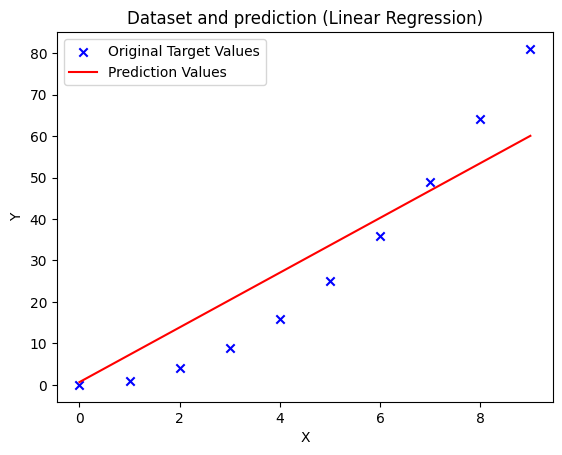

In [94]:
w_init = 0
b_init = 0
alpha = 1e-5
iterations = 10000

w_final, b_final, total_cost = run_gradient_descent(
    x_train, y_train, w_init, b_init, alpha, iterations)

print(f"Found:\nw = {w_final}\nb = {b_final}\ncost = {total_cost}")
y_predict = w_final * x_train + b_final

plt.title("Dataset and prediction (Linear Regression)")
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(x_train, y_train, marker="x", c="b",
            label="Original Target Values")
plt.plot(x_train, y_predict, c="r", label="Prediction Values")
plt.legend()
plt.show()


### Fitting Using Polynomial Regression

In [96]:
# Model: f_wb(x) = w * x^2 + b
def polynomial_prediction(x, w, b):
    return w * (x ** 2) + b


# Cost Function
def polynomial_cost(x_train, y_train, w, b):
    total_cost = 0
    for i in range(m):
        y_hat = polynomial_prediction(x_train[i], w, b)
        error = y_hat - y_train[i]
        total_cost += error ** 2
    total_cost /= 2 * m
    return total_cost


# Gradients
def polynomial_gradient(x_train, y_train, w, b):
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        y_hat = polynomial_prediction(x_train[i], w, b)
        dj_dw += (y_hat - y_train[i]) * x_train[i]
        dj_db += (y_hat - y_train[i])

    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db


# Gradient Descent
def run_gradient_descent_polynomail(x_train, y_train, w, b, alpha, iterations=1000):
    for it in range(1, iterations + 1):
        dj_dw, dj_db = polynomial_gradient(x_train, y_train, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
    return w, b, polynomial_cost(x_train, y_train, w, b)


Found:
w = 0.9969832362738965
b = 0.13550925878292247
cost = 0.004507773148807956


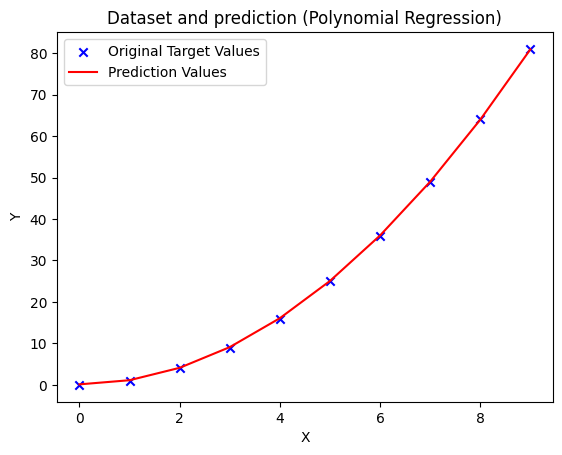

In [97]:
w_init = 0
b_init = 0

w_final, b_final, total_cost = run_gradient_descent_polynomail(
    x_train, y_train, w_init, b_init, alpha, iterations)

print(f"Found:\nw = {w_final}\nb = {b_final}\ncost = {total_cost}")
y_predict = w_final * (x_train ** 2) + b_final

plt.title("Dataset and prediction (Polynomial Regression)")
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(x_train, y_train, marker="x", c="b",
            label="Original Target Values")
plt.plot(x_train, y_predict, c="r", label="Prediction Values")
plt.legend()
plt.show()
